Churn Prediction

In [1]:
import pandas as pd
dataset=pd.read_csv("churn.csv")
#print(dataset.head())

In [2]:
pd.set_option('display.max_columns', None)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(dataset[dataset["Churn"]=="Yes"].shape)
print(dataset.shape)

(1869, 21)
(7043, 21)


In [4]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dataset.TotalCharges=pd.to_numeric(dataset.TotalCharges, errors='coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
dataset.dropna(how='any', inplace=True)

In [8]:
print(dataset['tenure'].max())

72


In [9]:
label=[f'{i}-{i+11}' for i in range(1,72,12)]
dataset["Tenure_groups"]=pd.cut(dataset.tenure, range(1, 80, 12), right=False, labels=label)

In [10]:
dataset.drop(columns=["tenure"], axis=1, inplace=True)

In [11]:
pd.set_option('display.max_columns', None)
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_groups
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


In [12]:
dataset["Tenure_groups"].value_counts()

Tenure_groups
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

In [13]:
dataset.drop(columns=["customerID"], axis=1, inplace=True)

In [14]:
dataset=pd.get_dummies(dataset)

In [15]:
pd.set_option('display.max_columns', None)
dataset.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,Tenure_groups_1-12,Tenure_groups_13-24,Tenure_groups_25-36,Tenure_groups_37-48,Tenure_groups_49-60,Tenure_groups_61-72
0,0,29.85,29.85,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False
2,0,53.85,108.15,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,False,True,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,False


In [16]:
dataset.drop(columns=["gender_Female", "Partner_No", "Dependents_No", "PhoneService_No", "OnlineSecurity_No internet service", "OnlineBackup_No internet service", "DeviceProtection_No internet service", "TechSupport_No internet service", "StreamingTV_No internet service", "StreamingMovies_No internet service", "Contract_Two year", "PaymentMethod_Mailed check", "Churn_No", "Tenure_groups_61-72"], axis=1, inplace=True)

In [17]:
pd.set_option('display.max_columns', None)
dataset.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Churn_Yes,Tenure_groups_1-12,Tenure_groups_13-24,Tenure_groups_25-36,Tenure_groups_37-48,Tenure_groups_49-60
0,0,29.85,29.85,False,True,False,False,False,True,False,True,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False
1,0,56.95,1889.50,True,False,False,True,True,False,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True,False,False,False,False,False,False,False,True,False,False
2,0,53.85,108.15,True,False,False,True,True,False,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,False,False,True,True,False,False,False,False
3,0,42.30,1840.75,True,False,False,False,False,True,False,True,False,False,False,True,True,False,False,True,False,True,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,True,False
4,0,70.70,151.65,False,False,False,True,True,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False,False,True,True,True,False,False,False,False


<Axes: >

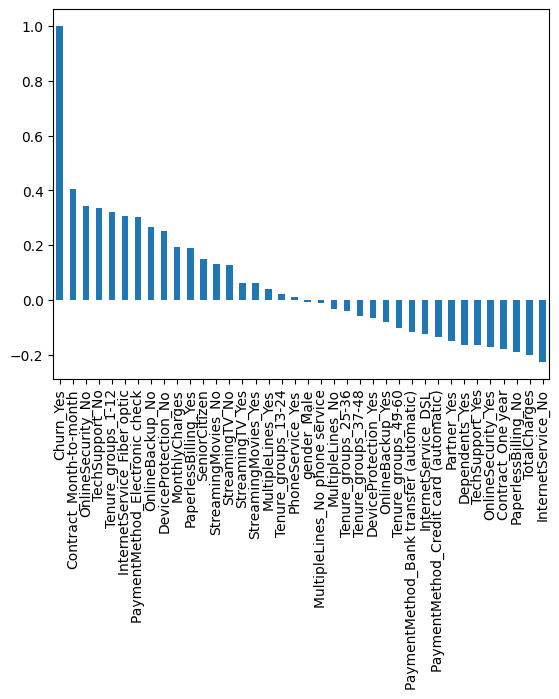

In [19]:
import matplotlib.pyplot as plt
plt.figure
dataset.corr()["Churn_Yes"].sort_values(ascending=False).plot(kind="bar")

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Upsampling

In [21]:
df_majority=dataset[dataset["Churn_Yes"]==0]
df_minority=dataset[dataset["Churn_Yes"]==1]

In [22]:
df_majority.shape, df_minority.shape


((5163, 38), (1869, 38))

In [23]:
from sklearn.utils import resample
df_minor=resample(df_minority, n_samples=5163, random_state=0)

In [24]:
dataset=pd.concat([df_majority, df_minor])

In [25]:
dataset=dataset.sample(frac=1)

In [26]:
dataset.reset_index(drop=True, inplace=True)

In [27]:
y=dataset["Churn_Yes"]
dataset.drop(columns=["Churn_Yes"], inplace=True)


In [28]:
pd.set_option('display.max_columns', None)
dataset.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Tenure_groups_1-12,Tenure_groups_13-24,Tenure_groups_25-36,Tenure_groups_37-48,Tenure_groups_49-60
0,1,93.25,5774.55,True,True,True,True,False,False,True,False,True,False,False,True,False,True,True,False,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True
1,0,40.15,1626.05,True,True,False,False,False,True,False,True,False,False,False,True,True,False,True,False,True,False,False,True,True,False,True,False,False,True,True,False,False,False,False,False,True,False
2,0,19.80,198.25,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False
3,0,58.85,465.70,True,True,True,False,False,True,False,True,False,False,False,True,False,True,False,True,True,False,False,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False
4,1,79.60,195.05,False,False,False,True,True,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False,False,True,True,False,False,True,False,False,True,True,False,False,False,False


In [29]:
y.head()

0    False
1    False
2    False
3    False
4     True
Name: Churn_Yes, dtype: bool

In [30]:
print(y.value_counts())

Churn_Yes
False    5163
True     5163
Name: count, dtype: int64


In [31]:
x_train,x_test,y_train,y_test=train_test_split(dataset, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [34]:
y_pred = classifier.predict(x_test)

In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[870 139]
 [ 76 981]]


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8959341723136496